Notebook for simple linear regression based on no rankings, just raw values between 0-1 and tournament wins as target

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:

# Load your dataframe
df = pd.read_csv("TournamentDataNoRanks.csv")  # If loading from a file
columns = df.columns.tolist()

['Year',
 'Team',
 'Tempo',
 'AdjTempo',
 'OE',
 'AdjOE',
 'DE',
 'AdjDE',
 'AdjEM',
 'StREM',
 'StROE',
 'StRDE',
 'Barthag-AN',
 'Barthag-H',
 'AN-H AVG',
 'Barthag-Mom',
 'Barthag-N',
 'DV1',
 'DV2',
 'RPPF',
 'Wins']

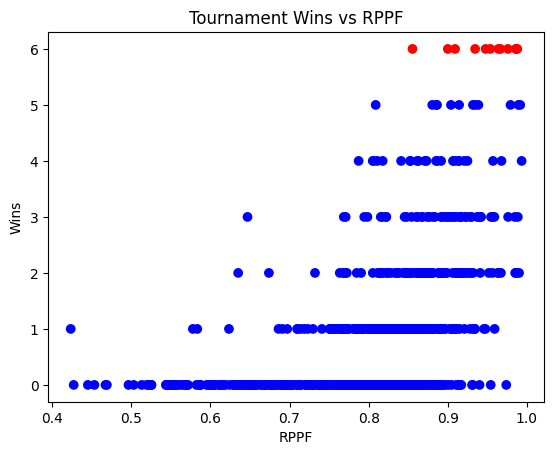

In [61]:
#out of curiously, lets plot tournament wins vs RPPF

colors = ['red' if win == 6 else 'blue' for win in df['Wins']]
plt.scatter(df['RPPF'], df['Wins'], c=colors)
plt.xlabel('RPPF')
plt.ylabel('Wins')
plt.title('Tournament Wins vs RPPF')
plt.show()



In [50]:

# Define features (X) and target variable (y)
feature_cols = columns[3:-2]  # Update with actual column names
X = df[feature_cols]
y = df['Wins']



In [52]:

# Split data into training and test sets (e.g., 80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [53]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [54]:
# Make predictions
y_pred = model.predict(X_test)



In [55]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.2680305839129353
R^2 Score: 0.3189461607011692


In [37]:
# Print feature coefficients
coefficients = pd.DataFrame({'Feature': feature_cols, 'Coefficient': model.coef_})
print(coefficients)

# Print intercept
print(f'Intercept: {model.intercept_}')

       Feature  Coefficient
0        AdjDE    -0.075217
1        AdjEM     0.189806
2        StREM    -3.061283
3        StROE     0.000003
4        StRDE     0.097597
5   Barthag-AN    -2.019682
6    Barthag-H    -1.915137
7     AN-H AVG    -1.967409
8  Barthag-Mom    -0.120507
Intercept: 6.150853099122084


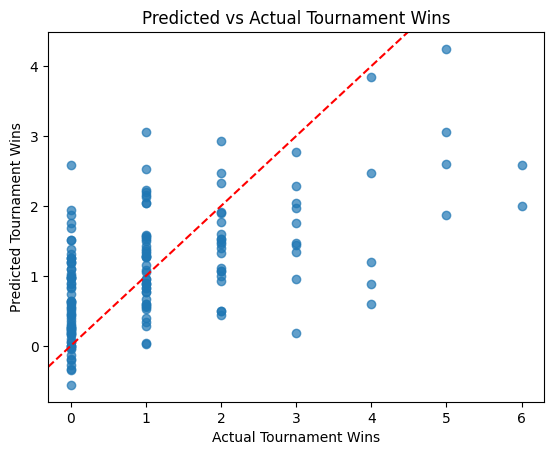

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Tournament Wins")
plt.ylabel("Predicted Tournament Wins")
plt.title("Predicted vs Actual Tournament Wins")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")  # Ideal 1:1 line
plt.show()

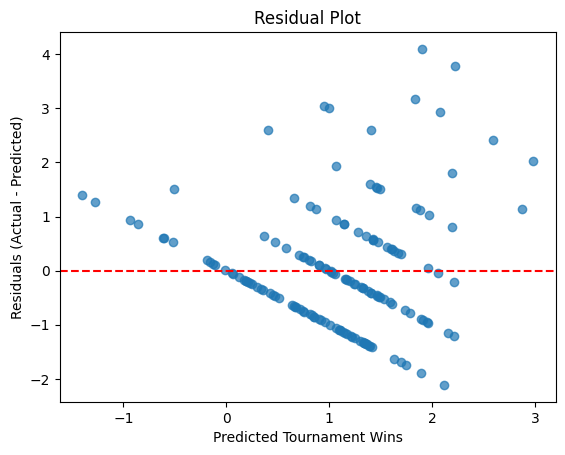

In [11]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Tournament Wins")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()